In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston_db = pd.read_csv('boston_housing.csv')

In [3]:
boston_db.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
boston_db.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
columns = ['RM', 'DIS', 'TAX', 'INDUS']

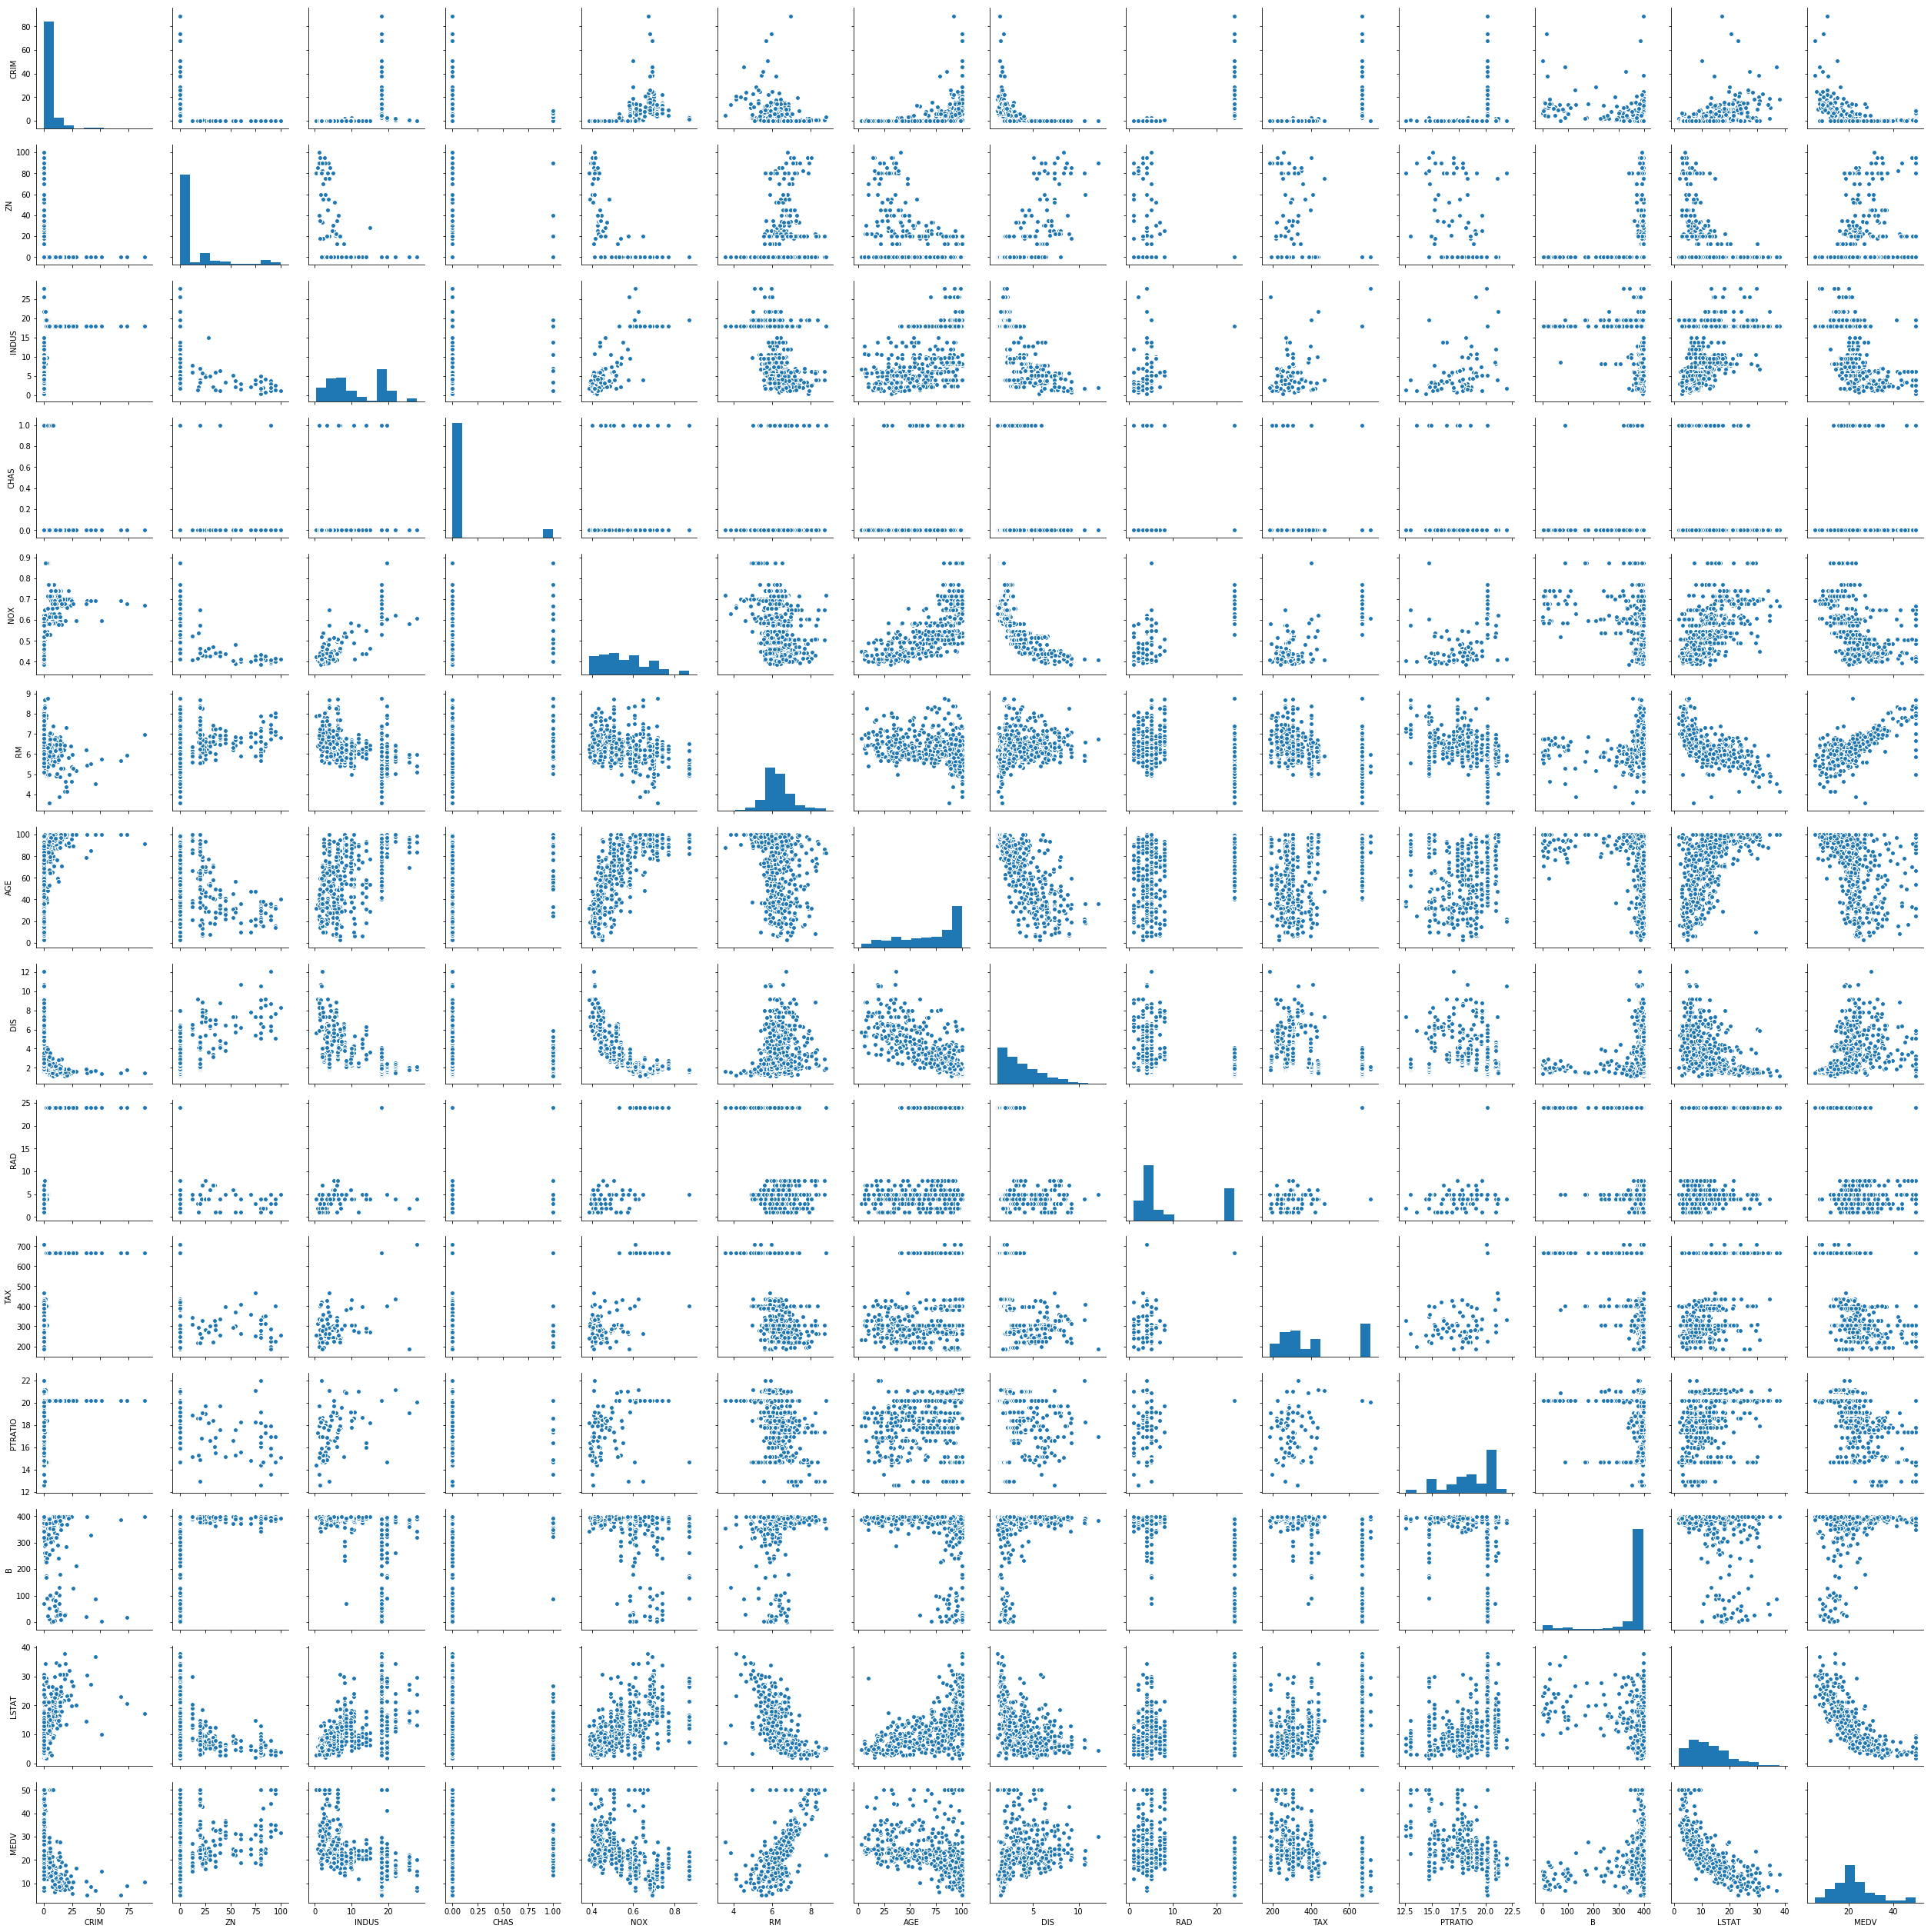

In [7]:
import seaborn as sns
sns.pairplot(boston_db)

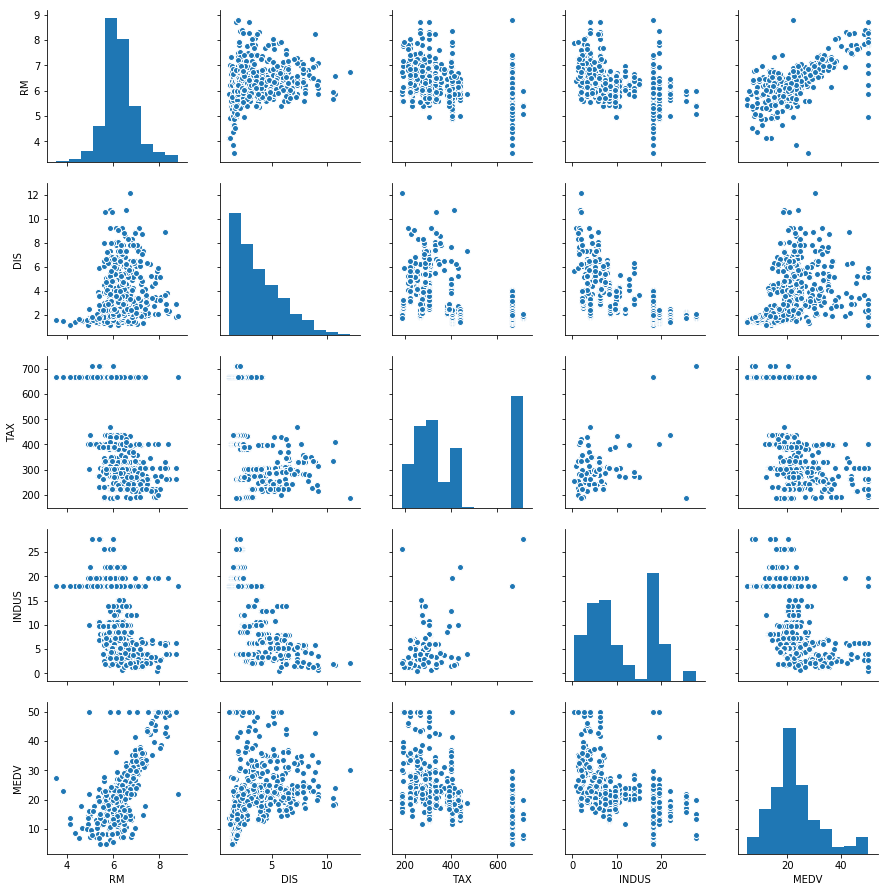

In [12]:
 sns.pairplot(boston_db[['RM', 'DIS', 'TAX', 'INDUS', 'MEDV']])

# Finding the collinearlity 

In [32]:
X = boston_db[columns]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X.values, idx) for idx in range(X.shape[1])], index=X.columns)
print(vif)

RM       16.747965
DIS       6.880607
TAX      13.861510
INDUS     9.598374
dtype: float64


# Normalizing the data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaler.fit(boston_db[['RM', 'DIS', 'TAX', 'INDUS', 'MEDV']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
boston_db_norm = scaler.transform(boston_db[['RM', 'DIS', 'TAX', 'INDUS', 'MEDV']])

In [37]:
boston_db_norm

array([[ 0.41367189,  0.1402136 , -0.66660821, -1.2879095 ,  0.15968566],
       [ 0.19427445,  0.55715988, -0.98732948, -0.59338101, -0.10152429],
       [ 1.28271368,  0.55715988, -0.98732948, -0.59338101,  1.32424667],
       ...,
       [ 0.98496002, -0.77368357, -0.80321172,  0.11573841,  0.14880191],
       [ 0.72567214, -0.66843684, -0.80321172,  0.11573841, -0.0579893 ],
       [-0.36276709, -0.61324648, -0.80321172,  0.11573841, -1.15724782]])

In [38]:
boston_df_norm = pd.DataFrame(boston_db_norm, columns=['RM', 'DIS', 'TAX', 'INDUS', 'MEDV'])

In [39]:
boston_df_norm.head()

,RM,DIS,TAX,INDUS,MEDV
0,0.413672,0.140214,-0.666608,-1.287909,0.159686
1,0.194274,0.557160,-0.987329,-0.593381,-0.101524
2,1.282714,0.557160,-0.987329,-0.593381,1.324247
3,1.016303,1.077737,-1.106115,-1.306878,1.182758
4,1.228577,1.077737,-1.106115,-1.306878,1.487503


In [40]:
X1 = boston_df_norm[columns]

In [41]:
vif1 = pd.Series([variance_inflation_factor(X1.values, idx) for idx in range(X.shape[1])], index=X1.columns)
print(vif1)

RM       1.196445
DIS      2.035552
TAX      2.087118
INDUS    3.258492
dtype: float64


In [42]:
boston_db.MEDV.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [43]:
boston_df_norm.MEDV.head()

0    0.159686
1   -0.101524
2    1.324247
3    1.182758
4    1.487503
Name: MEDV, dtype: float64

# Plotting Feature variables vs Target variable

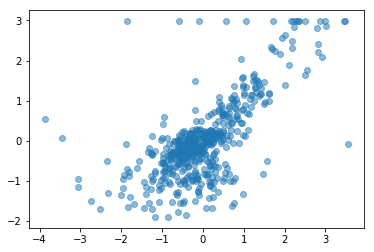

In [48]:
plt.scatter(boston_df_norm.RM, boston_df_norm.MEDV, alpha=0.5)

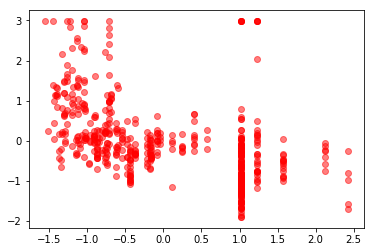

In [49]:
plt.scatter(boston_df_norm.INDUS, boston_df_norm.MEDV, c='r', alpha=0.5)

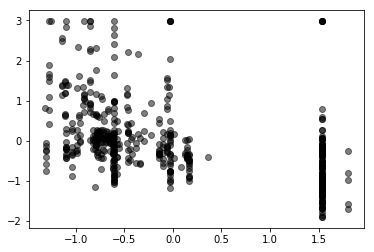

In [51]:
plt.scatter(boston_df_norm.TAX, boston_df_norm.MEDV, c='black', alpha=0.5)

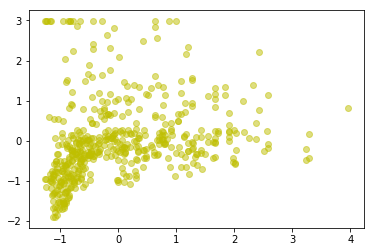

In [52]:
plt.scatter(boston_df_norm.DIS, boston_df_norm.MEDV, c='y', alpha=0.5)

# Split the data

In [55]:
y = boston_df_norm['MEDV']
X = boston_df_norm[boston_df_norm.columns.drop('MEDV')]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Building the model

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# Train Score 
model.score(X_train, y_train)

0.6093655458735683

In [61]:
# Test Score 
model.score(X_test, y_test)

0.4994406204451507

In [70]:
# Model score
model.score(X, y)

0.5688994039185953

In [66]:
# RMSE for train
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_RMSE = mean_squared_error(y_train, train_pred)**0.5
train_RMSE

0.6048426073998742

In [68]:
test_pred = model.predict(X_test)
test_RMSE = mean_squared_error(y_test, test_pred)**0.5
test_RMSE

0.7507241178606289

# Coefficient and Intercept

In [69]:
print('Coefficient', model.coef_, '\nIntercept:', model.intercept_)

Coefficient [ 0.60755053 -0.09887596 -0.22706602 -0.13991138] 
Intercept: 5.59223871336792e-05


# Adjusted R Sqaure

In [72]:
adjusted_rscore = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)

0.5654574829917977
